In [ ]:
#######Importing important libraries######

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
########## Importing the data ##########

bike = pd.read_csv("day.csv")
print( "Dataset succesfully imported") 

Dataset succesfully imported


In [ ]:
########## first five rows of dataset ##########

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Dataset Details

In [ ]:
####### check no. of rows and columns #######

bike.shape

(730, 16)

There are 730 records and 16 features in the given dataset

In [ ]:
####### check datastypes #######

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


We have 16 features in dataset it contains mostly integer and float data types and only one object datatype which is not correct as its Date.

In [ ]:
####### changing the datatype of dteday #######

bike['dteday']=pd.to_datetime(bike['dteday'])

In [ ]:
bike.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [ ]:
####### check duplicate rows #######

bike.duplicated().sum()

0

Doesnt contain any dublicate rows.

In [ ]:
####### check for null values #######

bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

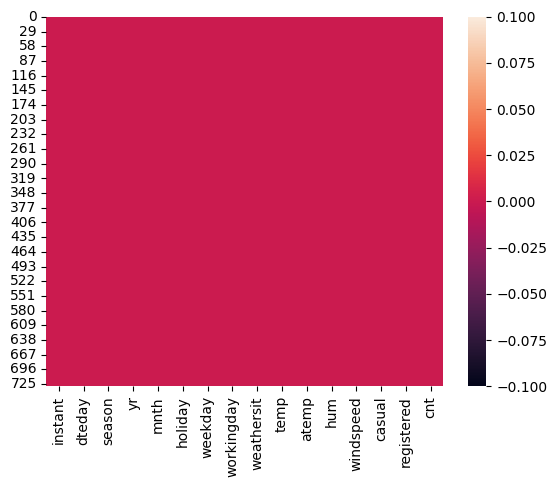

In [ ]:
sns.heatmap(bike.isna());

Doesnt contain any null value in the given dataset.

In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


There are outliers in hum,windspped,casual and cnt

# EDA

instant is same as index so we can drop it 

also we have months and year seperately in dataset so we dont need the dteday column

In [ ]:
####### Dropping unnecessary columns #######

bike.drop(columns={'instant','dteday'}, inplace = True)
print('Columns instant and deliveryday are deleted from dataset')

Columns instant and deliveryday are deleted from dataset


In [ ]:
### also we can drop casual and registered features as cnt feature is already in dataset ###

bike.drop(columns={'casual','registered'}, inplace=True)

In [ ]:
##### renaming some features #####

bike.rename(columns={"cnt":"count","yr":"Year","mnth":"month","hum":"humidity"}, inplace= True)

In [ ]:
#Count distinct observations without NaN values

bike.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
windspeed     649
atemp         689
count         695
dtype: int64

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

In [ ]:
#### coorelation between all columns ###

bike.corr()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
Year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


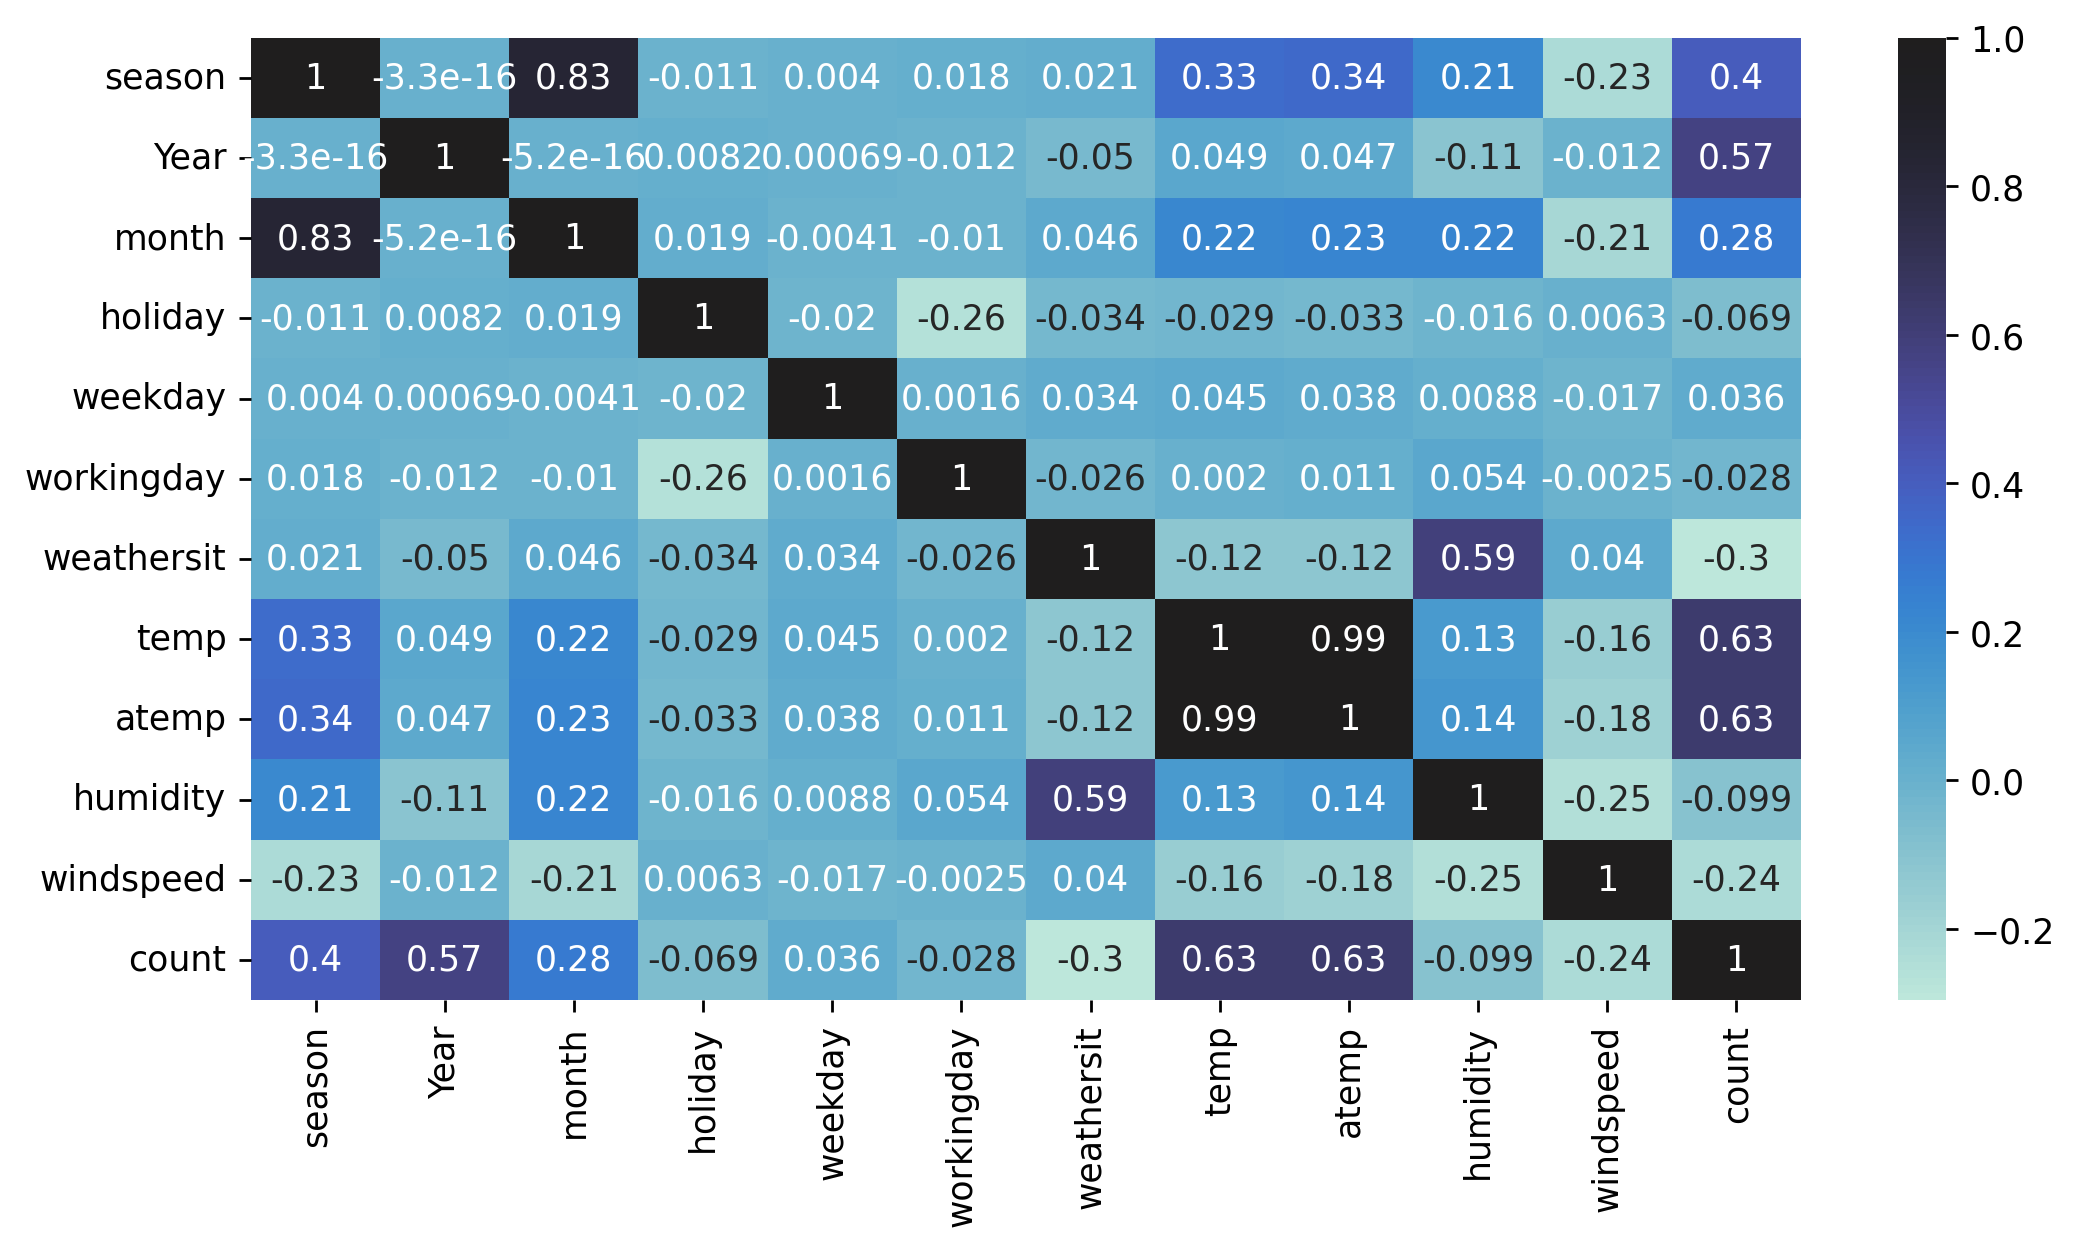

In [ ]:
sns.heatmap(bike.corr(), annot=True,center= True);

There is very high corelation which is almost 1 in between temp and atemp 

we can drop any one column from the dataset.


In [ ]:
bike.drop(columns={'atemp'}, inplace =True)

In [ ]:
bike[["holiday","weekday", "workingday"]].corr()

,holiday,weekday,workingday
holiday,1.000000,-0.020145,-0.257009
weekday,-0.020145,1.000000,0.001588
workingday,-0.257009,0.001588,1.000000


There is very less corelation in between holiday and workingday

In [ ]:
bike.columns

Index(['season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [ ]:
bike["Year"].nunique()

2

# Data Visualisation

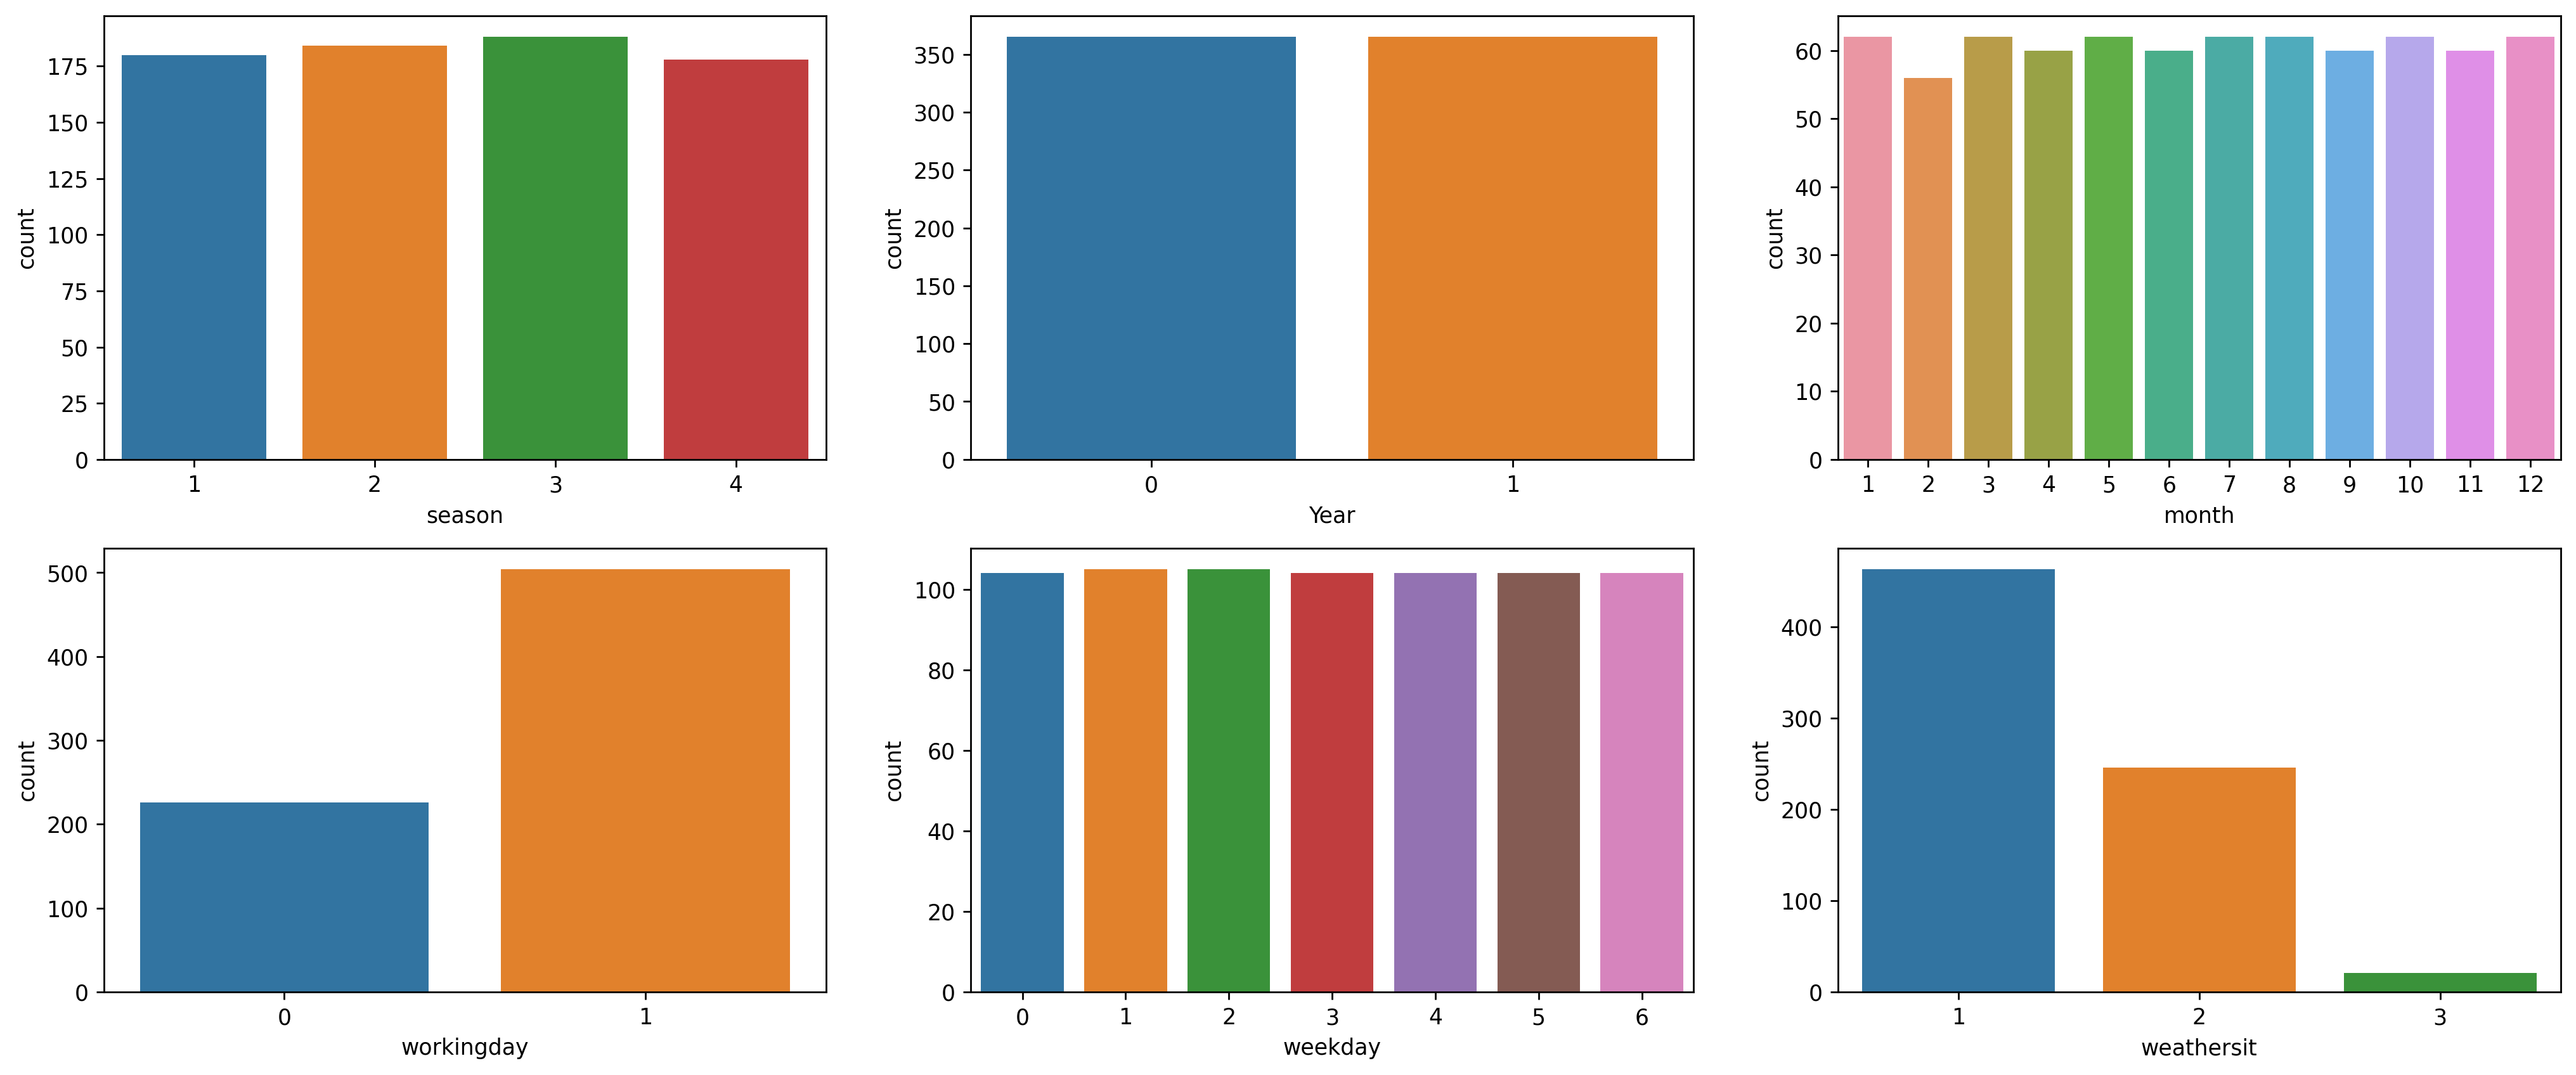

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))

plt.subplot(231)
sns.countplot(data=bike, x='season')

plt.subplot(232)
sns.countplot(data=bike, x='Year')

plt.subplot(233)
sns.countplot(data=bike, x='month')

plt.subplot(234)
sns.countplot(data=bike, x='workingday')

plt.subplot(235)
sns.countplot(data=bike, x='weekday')

plt.subplot(236)
sns.countplot(data=bike, x='weathersit')

plt.show()


From the above countplot, We can see around 175 bike rentals in 4 seasons also we have 2 years of data in which around 350 bikes rentals.

In the month of Feb, bike renatal is slightly low than other months.

Maximum bike rentals are in working days which is almost 100 bike renatals.
also Maximum bike rentals are in clear weather


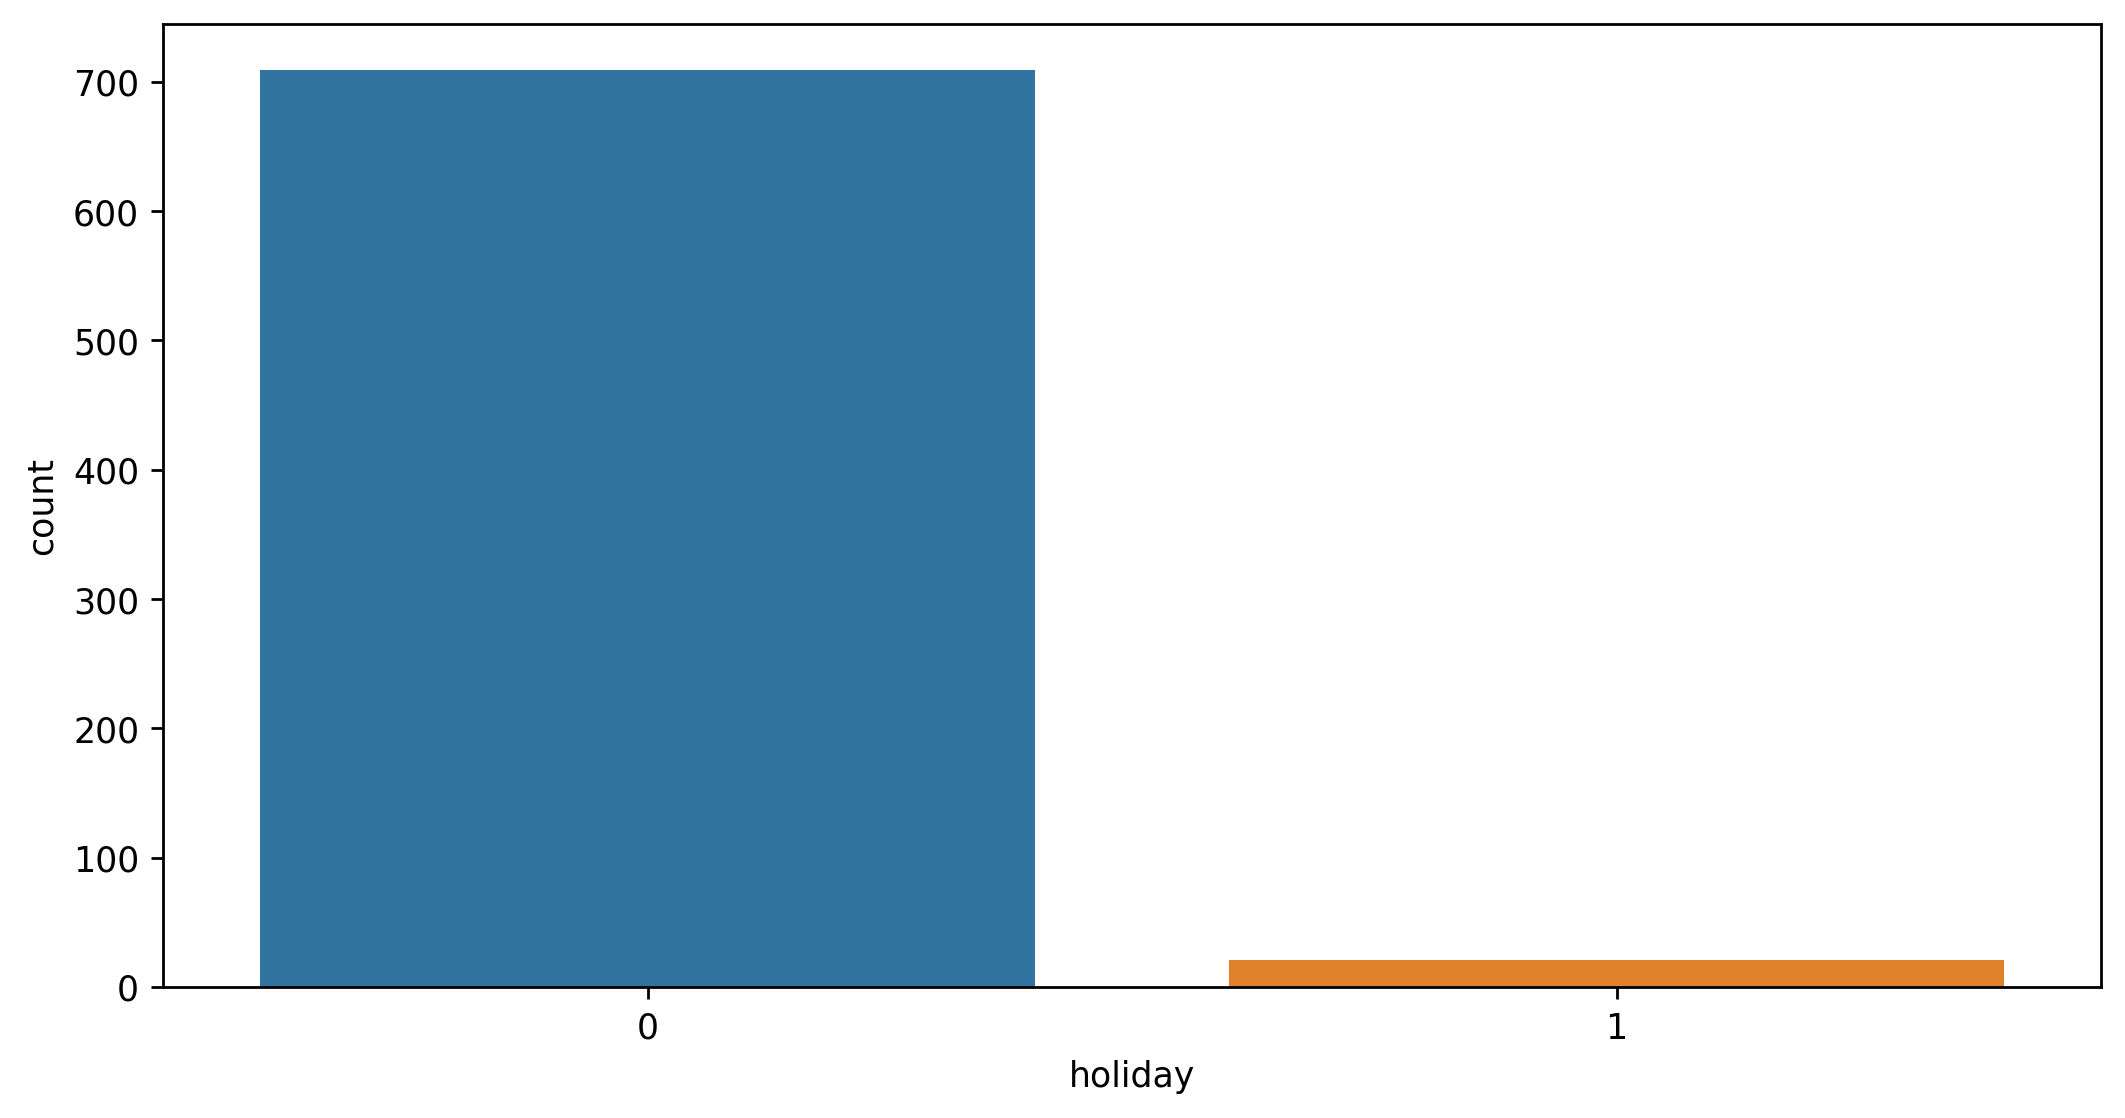

In [ ]:
sns.countplot(x='holiday',data=bike);

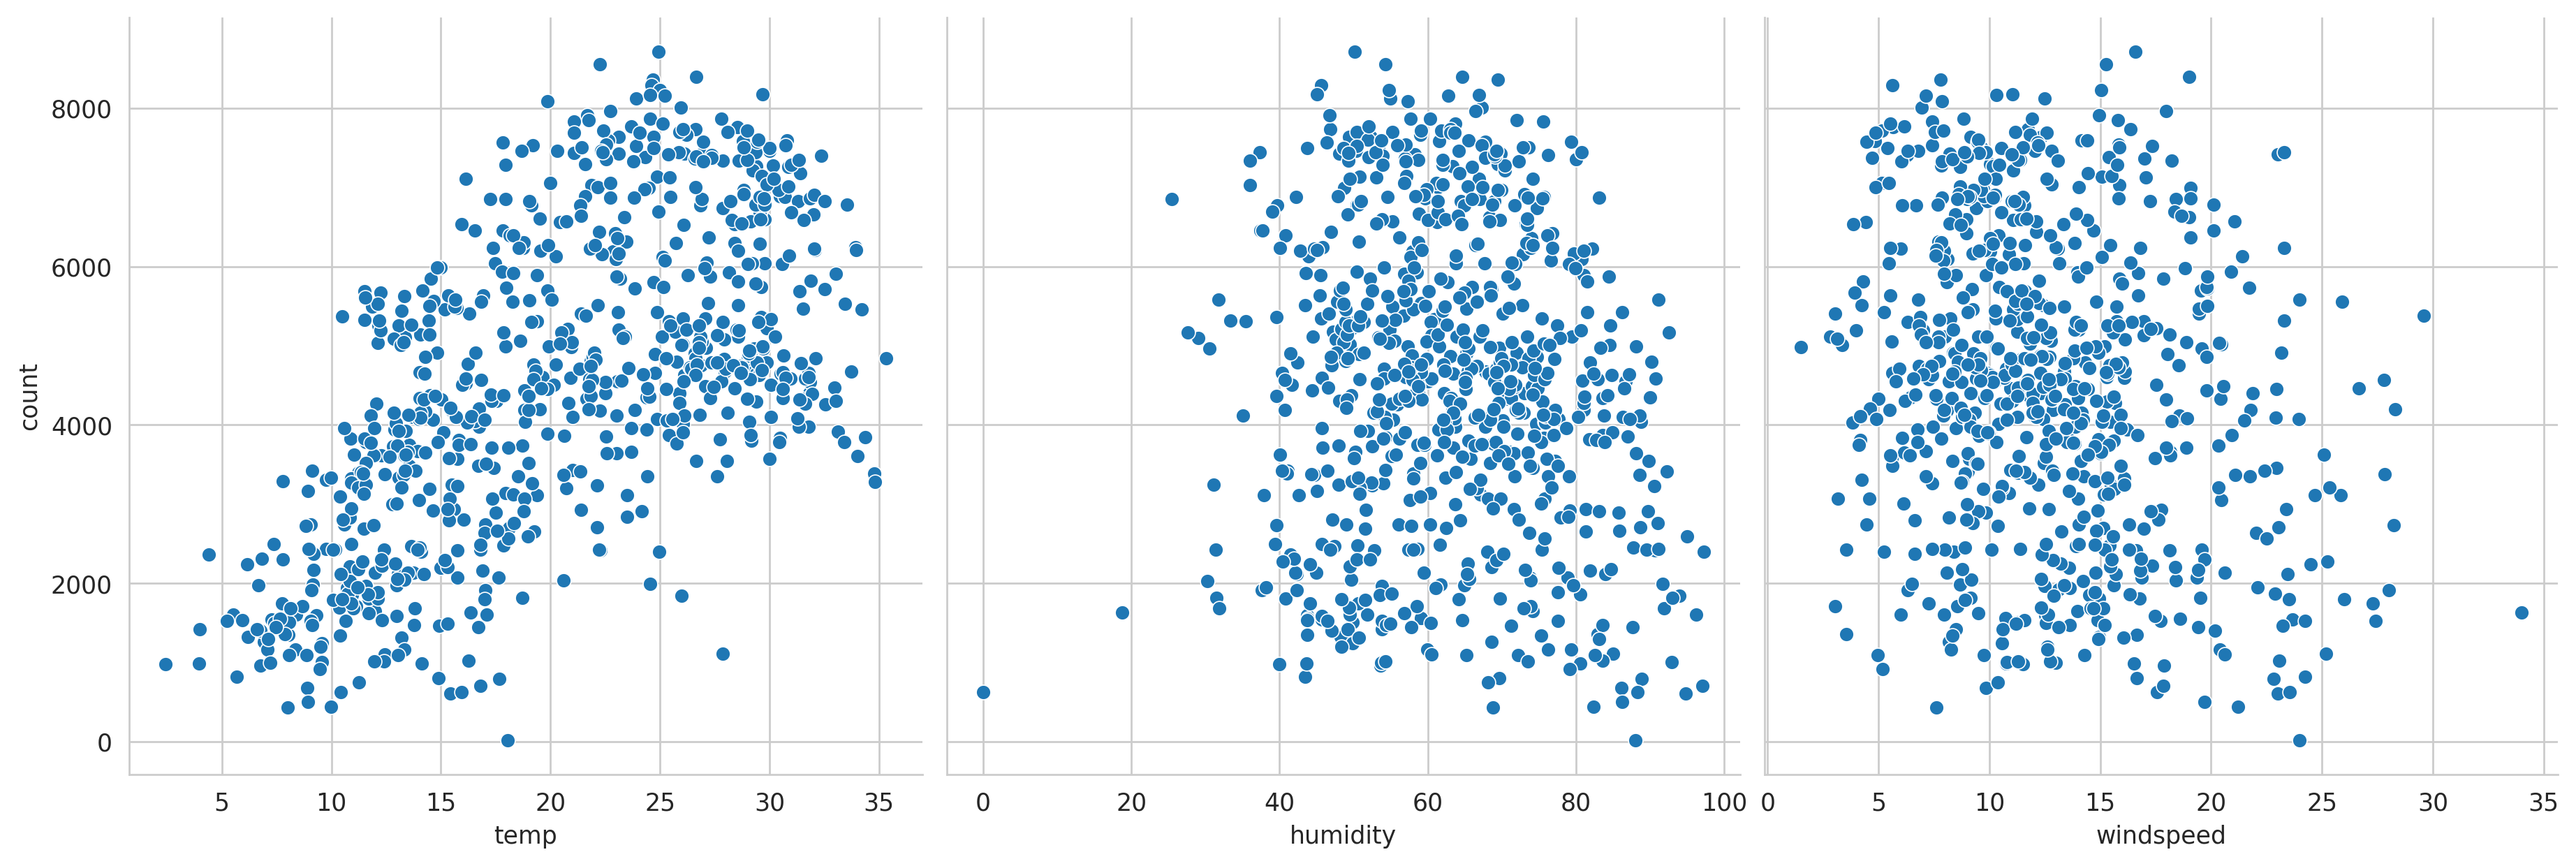

In [ ]:
sns.set_style("whitegrid")

sns.pairplot(data=bike,x_vars=['temp','humidity','windspeed'],y_vars='count',kind='scatter',height=5,aspect=1);

As the temperature increases, the bike rentals increases.

in the second scatter plot, we can see there is outlier from below 20
also in the third graph, there is one outlier lies in near 35 windspeed.


To understand more, we will use a boxplot to find outliers

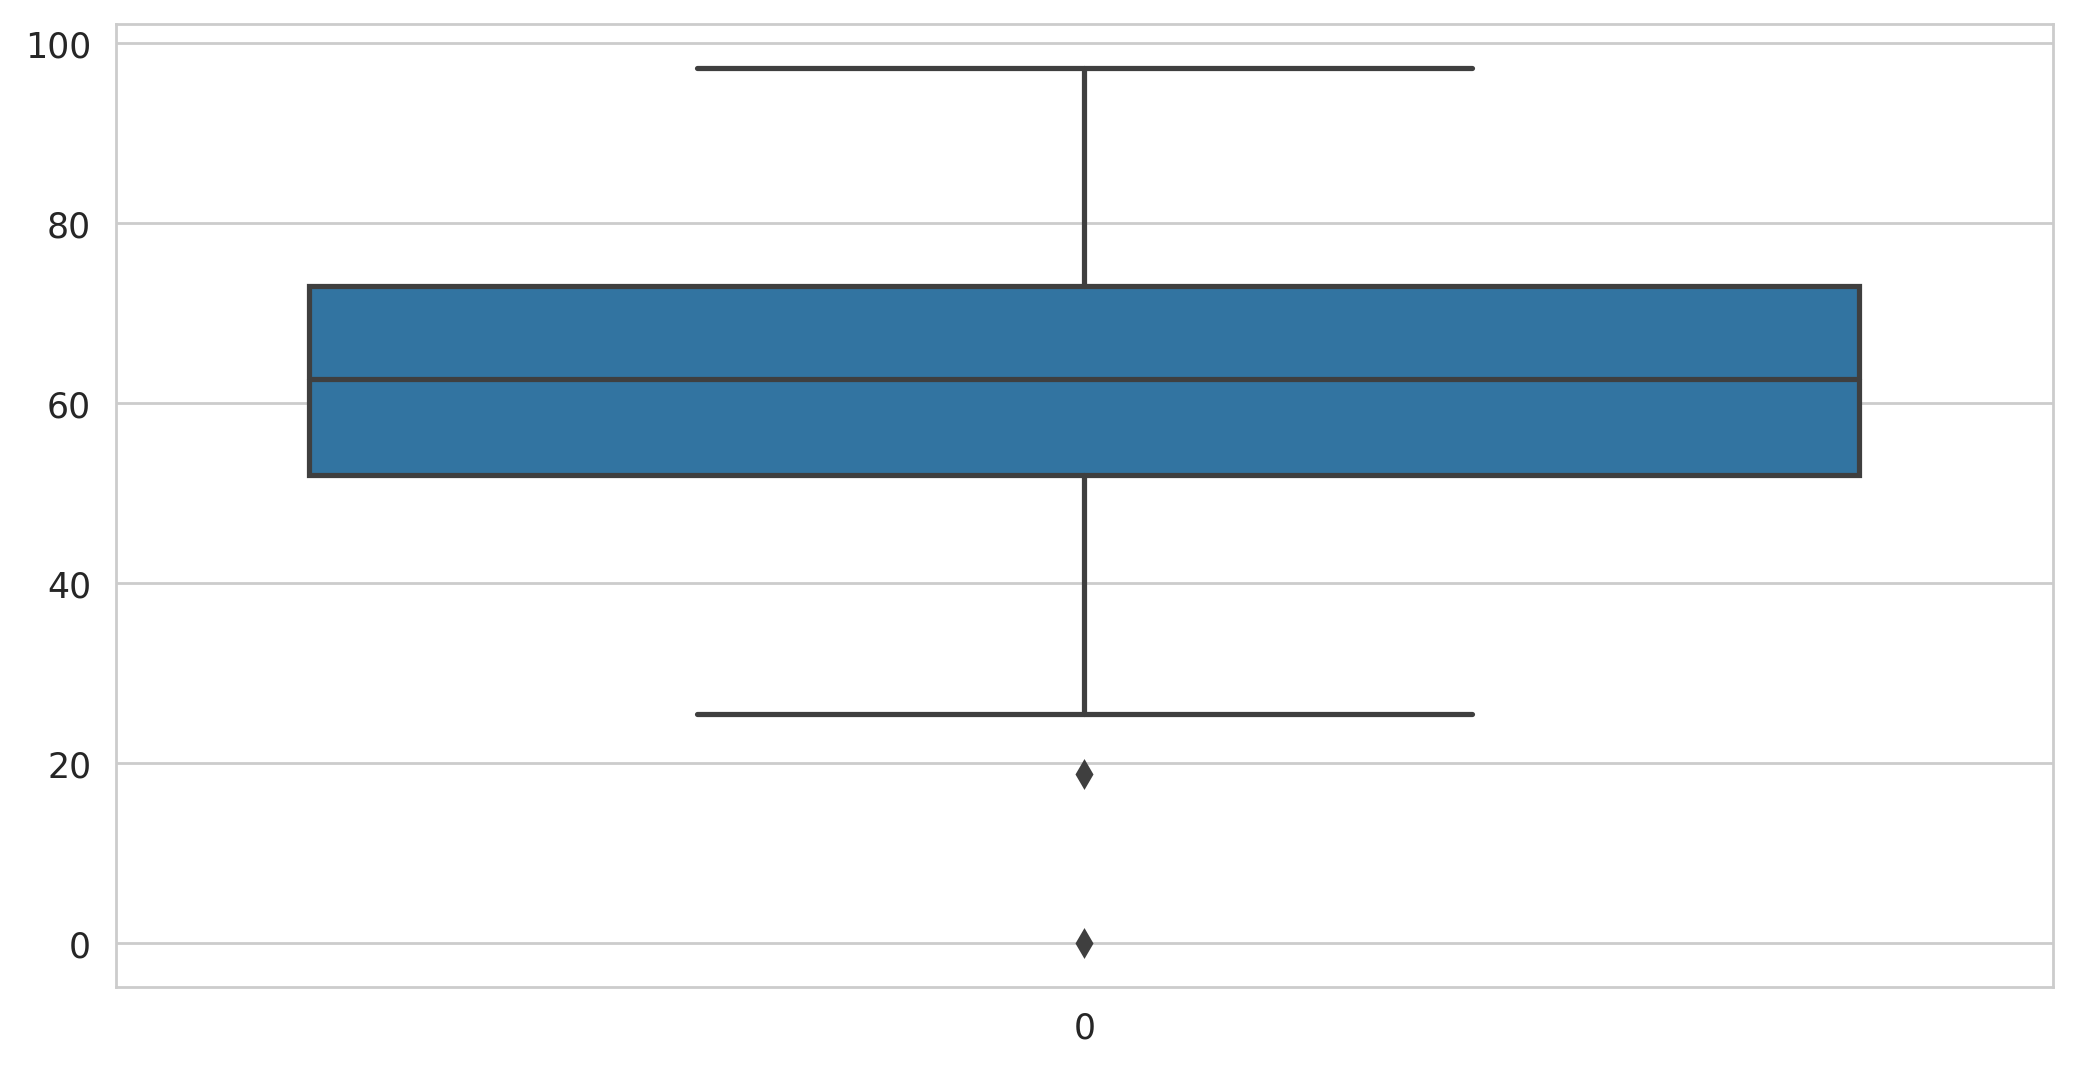

In [ ]:
sns.boxplot(bike['humidity']);

its clearly shows that there are two outliers in between 0 to 20.

In [ ]:
#outliers in hum

bike= bike.drop(index = bike[(bike['humidity'] < 20)].index)
print('Dropped two rows successfully')

Dropped two rows successfully


In [ ]:
bike.shape

(728, 11)

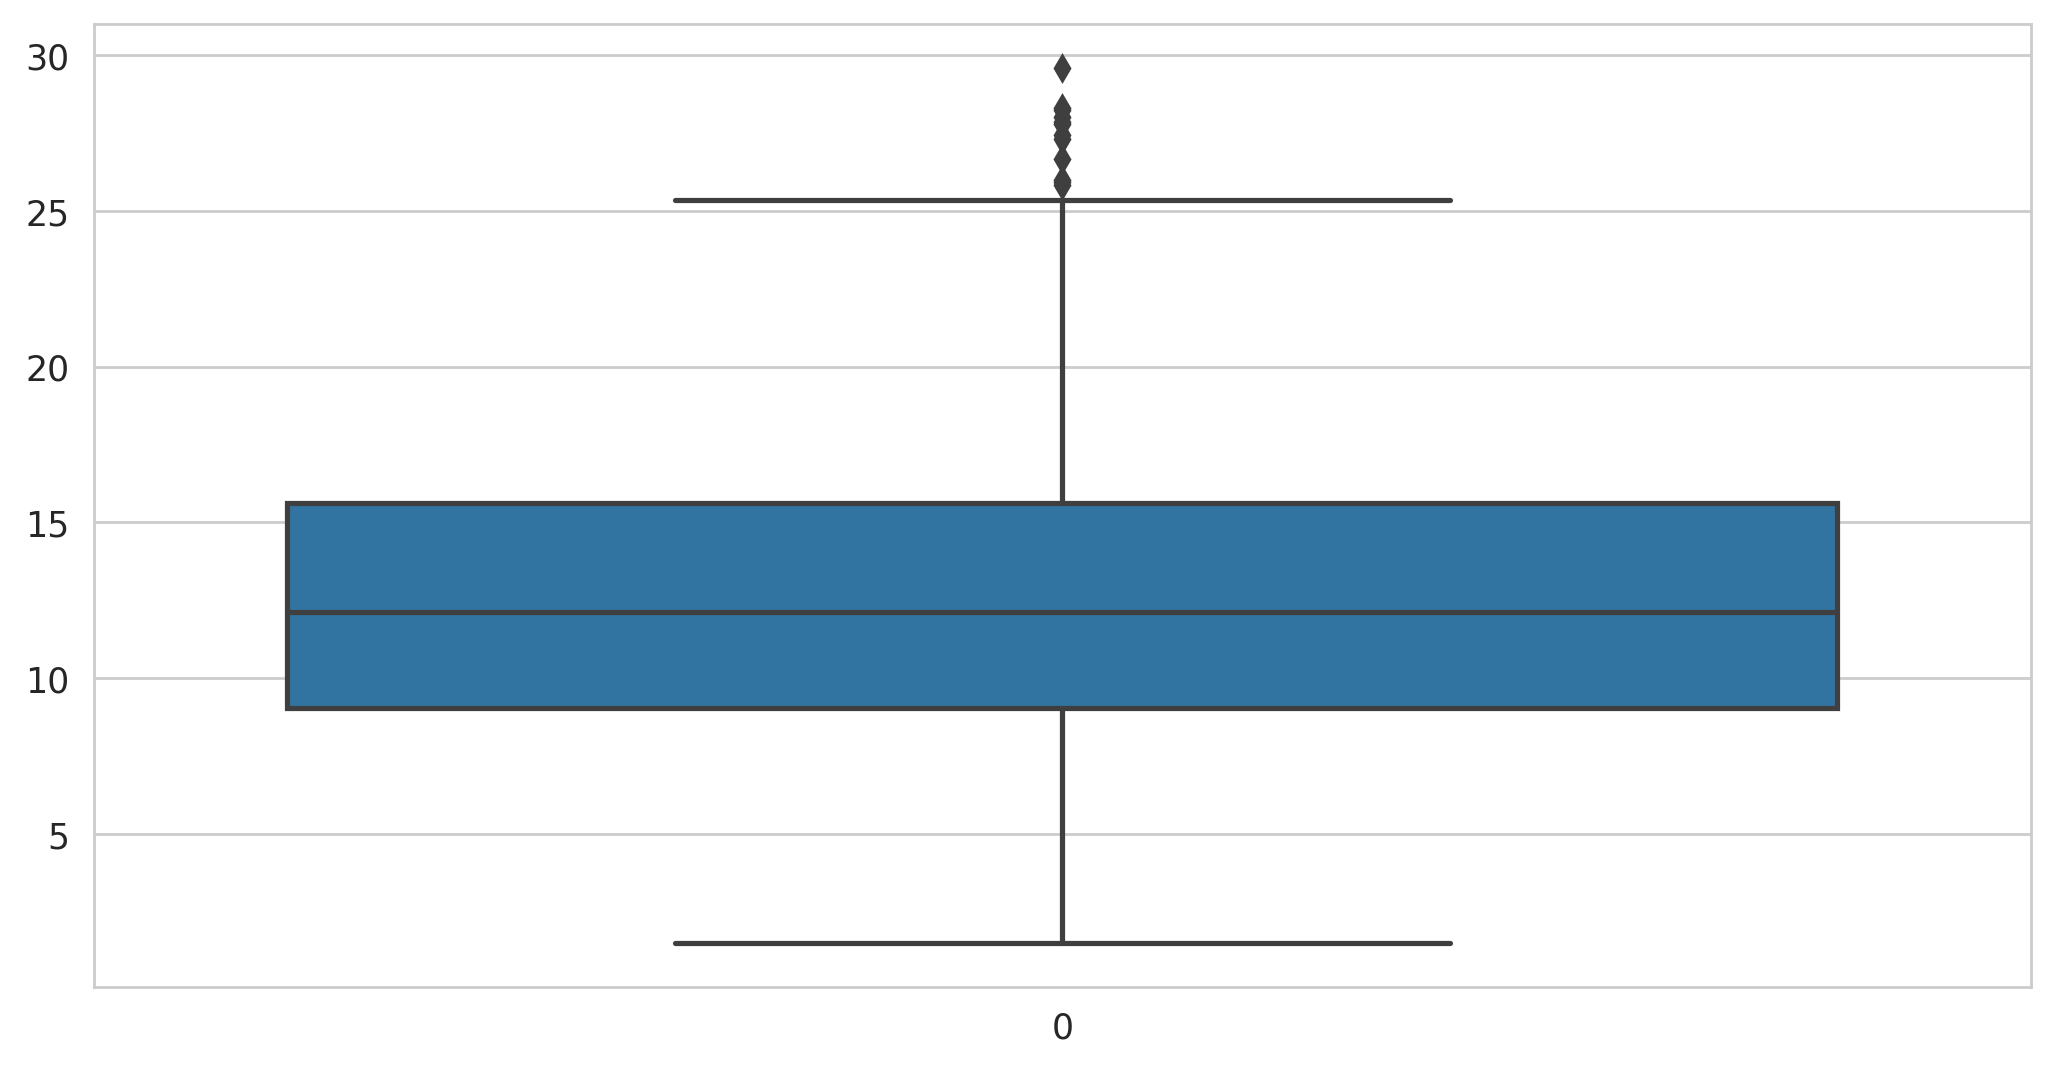

In [ ]:
sns.boxplot(bike['windspeed']);

its clearly shows that there are outliers above 25

In [ ]:
#outliers in windspeed

bike= bike.drop(index = bike[(bike['windspeed'] > 25)].index)
print('Dropped rows successfully')

Dropped rows successfully


In [ ]:
bike.shape

(712, 11)

In [ ]:
bike.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [ ]:
# Convert to 'category' data type

bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['month']=bike['month'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      712 non-null    category
 1   Year        712 non-null    int64   
 2   month       712 non-null    category
 3   holiday     712 non-null    int64   
 4   weekday     712 non-null    category
 5   workingday  712 non-null    int64   
 6   weathersit  712 non-null    category
 7   temp        712 non-null    float64 
 8   humidity    712 non-null    float64 
 9   windspeed   712 non-null    float64 
 10  count       712 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 48.3 KB


In [ ]:
#### Create Dummy variable ####

bike = pd.get_dummies(bike)

In [ ]:
bike.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
bike.describe()

,Year,holiday,workingday,temp,humidity,windspeed,count,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,...,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.497191,0.029494,0.692416,20.425544,63.161041,12.410371,4547.733146,0.237360,0.254213,0.262640,...,0.141854,0.141854,0.144663,0.143258,0.144663,0.143258,0.140449,0.633427,0.338483,0.028090
std,0.500344,0.169307,0.461818,7.525833,13.895258,4.730614,1930.599170,0.425764,0.435724,0.440378,...,0.349146,0.349146,0.352008,0.350582,0.352008,0.350582,0.347697,0.482207,0.473526,0.165346
min,0.000000,0.000000,0.000000,2.424346,25.416700,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.940000,52.505850,8.959307,3236.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.756250,63.083300,11.937591,4577.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.931885,73.260425,15.385361,6035.750000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,24.667189,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
var = ['temp','humidity', 'windspeed','count']

bike[var] = scaler.fit_transform(bike[var])

In [ ]:
bike.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,1,0.355170,0.767981,0.399260,0.110792,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0.379232,0.615202,0.654030,0.089623,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0.171000,0.254904,0.653364,0.152669,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0.175530,0.468123,0.398826,0.177174,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0.209120,0.254464,0.475766,0.181546,1,0,0,...,0,0,0,0,0,1,0,1,0,0


# SPLITTING THE DATA

We will split the data into two parts namely train and test with test size 20%

In [ ]:
#### Defining independent vaiables X and dependent variable y ####

x=bike.loc[:, bike.columns!='count']
y = bike['count']

In [ ]:
#### splitting the dataset into train and test ####

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size= 0.20, random_state=1)

# Model Building 

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
print("Accurancy of Training data is", regr.score(xtrain,ytrain))
print("Accurancy of Testing data is", regr.score(xtest,ytest))

Accurancy of Training data is 0.8481307173301862
Accurancy of Testing data is 0.8459312408302126


In [ ]:
ypred = regr.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(ytest,ypred)
print(score)

0.8459312408302126


### Random forest model

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_features=14,max_depth=7 )


In [76]:
rf.fit(xtrain, ytrain)


RandomForestRegressor(max_depth=7, max_features=14, random_state=42)

In [77]:
y_pred_rf = rf.predict(xtest)

In [78]:
print("Accurancy of Training data is", rf.score(xtrain,ytrain))
print("Accurancy of Testing data is", rf.score(xtest,ytest))

Accurancy of Training data is 0.9439778680075772
Accurancy of Testing data is 0.8831100954673742


In [79]:
from sklearn.metrics import r2_score
score=r2_score(ytest,y_pred_rf)
print(score)

0.8831100954673742
